In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (10).csv


# **1.Dataset Loading**

In [ ]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#2. **Library Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from plotly.subplots import make_subplots
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import RandomizedSearchCV

# **3. Data Overview**

In [ ]:
df.shape

(10000, 14)

In [ ]:
print("The total number of rows present in the dataset: {0}".format(df.shape[0]))
print("The total number of columns present in the dataset: {0}".format(df.shape[1]))

The total number of rows present in the dataset: 10000
The total number of columns present in the dataset: 14


In [ ]:
print("Now going through the general structure of the data and its datatype:")
df.info()

Now going through the general structure of the data and its datatype:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **4. Data Cleaning**

In [ ]:
print("Total number of null values present in each column:")
null_values = df.isna().sum()
fig = go.Figure(go.Bar(
    x=null_values.index,
    y=null_values.values,
    marker_color='crimson'
))
fig.update_layout(
    title='Total Number of Null Values in Each Column',
    xaxis_title='Column Name',
    yaxis_title='Number of Null Values',
)
fig.show()

Total number of null values present in each column:


There are no null values in any columns

In [ ]:
print("Now checking for duplicate Values")

duplicate_records_plotly = df.duplicated().value_counts()
fig = go.Figure(go.Bar(
    x=duplicate_records_plotly.index.map({False: 'Unique', True: 'Duplicate'}),
    y=duplicate_records_plotly.values,
    marker_color=['blue', 'red']
))
fig.update_layout(
    title='Duplicate Records in DataFrame',
    xaxis_title='Is Duplicate',
    yaxis_title='Count',
    xaxis=dict(type='category')
)

fig.show()

Now checking for duplicate Values


From the above graph we can see that there is no duplicate records in this dataframe

In [ ]:
print("Now droping the columns insignificant to predict churned customers")
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
df = df.drop(columns=columns_to_drop)
df.head()

Now droping the columns insignificant to predict churned customers


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.rename(columns={"Exited":"ChurnedorNot"},inplace=True)
df["ChurnedorNot"].replace({0:"No",1:"Yes"},inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ChurnedorNot
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


# **5.EXPLORATORY DATA ANALYSIS**

**Distribution of Target Variable**

In [ ]:
churn_distribution = df['ChurnedorNot'].value_counts()

fig = go.Figure(data=[go.Pie(labels=['Stayed', 'Churned'],
                             values=churn_distribution.values,
                             pull=[0, 0.1])])
fig.update_layout(title_text='Distribution of Target Variable (Churned vs Stayed)')
fig.show()

As we can see from the above pie chart graph there is a big imbalance in the target variable , this imbalance can be overcome by using the SMOTE oversampling technique

**General Distribution of numerical features**

1. Credit Score Distribution

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of CreditScore", "Box Plot of CreditScore"))
fig.add_trace(go.Histogram(x=df['CreditScore'], name='CreditScore'), row=1, col=1)
fig.add_trace(go.Box(y=df['CreditScore'], name='CreditScore'), row=1, col=2)
fig.update_layout(title_text="1. CreditScore Distribution: Histogram and Box Plot", showlegend=False)
fig.show()

2. Age Distribution

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Age", "Box Plot of Age"))
fig.add_trace(go.Histogram(x=df['Age'], name='Age'), row=1, col=1)
fig.add_trace(go.Box(y=df['Age'], name='Age'), row=1, col=2)
fig.update_layout(title_text="2. Age Distribution: Histogram and Box Plot Side by Side", showlegend=False)
fig.show()

3. Balance Distribution

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Balance", "Box Plot of Balance"))
fig.add_trace(go.Histogram(x=df['Balance'], name='Balance'), row=1, col=1)

fig.add_trace(go.Box(y=df['Balance'], name='Balance'), row=1, col=2)

fig.update_layout(title_text="3. Balance Distribution: Histogram and Box Plot", showlegend=False)
fig.show()

4. Estimated Salary Distribution

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of EstimatedSalary", "Box Plot of EstimatedSalary"))
fig.add_trace(go.Histogram(x=df['EstimatedSalary'], name='EstimatedSalary'), row=1, col=1)
fig.add_trace(go.Box(y=df['EstimatedSalary'], name='EstimatedSalary'), row=1, col=2)
fig.update_layout(title_text="4. Estimated Salary Distribution: Histogram and Box Plot", showlegend=False)
fig.show()

5.Tenure Distribution

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Tenure", "Box Plot of Tenure"))
fig.add_trace(go.Histogram(x=df['Tenure'], name='Tenure'), row=1, col=1)
fig.add_trace(go.Box(y=df['Tenure'], name='Tenure'), row=1, col=2)
fig.update_layout(title_text="5. Tenure Distribution: Histogram and Box Plot", showlegend=False)
fig.show()

**General Distribution of Categorical Variable**

6. Gender Distribution

In [ ]:
gender_counts = df['Gender'].value_counts()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]],
                    subplot_titles=('Bar Chart of Gender', 'Pie Chart of Gender'))
fig.add_trace(
    go.Bar(x=gender_counts.index, y=gender_counts.values, name='Gender'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=gender_counts.index, values=gender_counts.values, name='Gender'),
    row=1, col=2
)
fig.update_layout(title_text="6. Distribution of Gender - Bar and Pie Chart ")
fig.show()

7. Geography Distribution

In [ ]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]],
                    subplot_titles=('Bar Chart of Geography', 'Pie Chart of Geography'))

geo_counts = df['Geography'].value_counts()

fig.add_trace(
    go.Bar(x=geo_counts.index, y=geo_counts.values, name='Geography'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=geo_counts.index, values=geo_counts.values, name='Geography'),
    row=1, col=2
)
fig.update_layout(title_text="7. Distribution of Geography - Bar and Pie Chart Side by Side")

fig.show()

8. NumofProducts Distribution

In [ ]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]],
                    subplot_titles=('Bar Chart of NumOfProducts', 'Pie Chart of NumOfProducts'))
products_counts = df['NumOfProducts'].value_counts()
fig.add_trace(
    go.Bar(x=products_counts.index.astype(str), y=products_counts.values, name='NumOfProducts'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(labels=products_counts.index.astype(str), values=products_counts.values, name='NumOfProducts'),
    row=1, col=2
)
fig.update_layout(title_text="8. Distribution of NumOfProducts - Bar and Pie Chart")
fig.show()

9. HasCrCard Distribution

In [ ]:

temp_has_card = df['HasCrCard'].map({1: 'Yes', 0: 'No'})
card_counts = temp_has_card.value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]],
                    subplot_titles=('Bar Chart of HasCrCard', 'Pie Chart of HasCrCard'))

fig.add_trace(
    go.Bar(x=card_counts.index, y=card_counts.values, name='HasCrCard'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(labels=card_counts.index, values=card_counts.values, name='HasCrCard'),
    row=1, col=2
)
fig.update_layout(
    title_text="9. Distribution of HasCrCard - Bar and Pie Chart",
    showlegend=True
)
fig.update_xaxes(title_text="Has Credit Card", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.show()

10. Active Member Distribution

In [ ]:
temp_is_active = df['IsActiveMember'].map({1: 'Yes', 0: 'No'})
active_member_counts = temp_is_active.value_counts()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]],
                    subplot_titles=('Bar Chart of IsActiveMember', 'Pie Chart of IsActiveMember'))
fig.add_trace(
    go.Bar(x=active_member_counts.index, y=active_member_counts.values, name='IsActiveMember'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(labels=active_member_counts.index, values=active_member_counts.values, name='IsActiveMember'),
    row=1, col=2
)
fig.update_layout(
    title_text="10. Distribution of IsActiveMember - Bar and Pie Chart",
    showlegend=True
)
fig.update_xaxes(title_text="Is Active Member", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.show()

Now that we know the general distribution of all categorical and the quanitative variables , lets see their distribution with context to the the target variable (ChurnedorNot )

11. Distribution of Gender Based on Churned or Not  Status

In [ ]:
gender_exited_counts = df.groupby(['Gender', 'ChurnedorNot']).size().reset_index(name='counts')
traces = []
for exited_status in gender_exited_counts['ChurnedorNot'].unique():
    trace = go.Bar(
        x=gender_exited_counts[gender_exited_counts['ChurnedorNot'] == exited_status]['Gender'],
        y=gender_exited_counts[gender_exited_counts['ChurnedorNot'] == exited_status]['counts'],
        name=f'Exited: {exited_status}'
    )
    traces.append(trace)
layout = go.Layout(
    title='11.Distribution of Gender Based on Churned or Not  Status',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Count'),
    barmode='group'
)
fig = go.Figure(data=traces, layout=layout)
fig.show()

As we can see , more number of females have left when compared to their male counterparts, so the bank should focus more on retaining their female customers

12. Churn Status Based on Geography

In [ ]:
geo_churn_counts = df.groupby(['Geography', 'ChurnedorNot']).size().reset_index(name='Count')
geo_churn_yes = geo_churn_counts[geo_churn_counts['ChurnedorNot'] == 'Yes']
geo_churn_no = geo_churn_counts[geo_churn_counts['ChurnedorNot'] == 'No']
trace_yes = go.Bar(
    x=geo_churn_yes['Geography'],
    y=geo_churn_yes['Count'],
    name='Yes',
    marker_color='rgb(55, 83, 109)'
)
trace_no = go.Bar(
    x=geo_churn_no['Geography'],
    y=geo_churn_no['Count'],
    name='No',
    marker_color='rgb(26, 118, 255)'
)
fig = go.Figure(data=[trace_yes, trace_no])
fig.update_layout(
    title='12. Churn Status Based on Geography',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show()

As we can see from the above graph ,more number of people have left the company in Germany

13. Churn Status Based on Credit Card Ownership

In [ ]:
df['HasCrCard'] = df['HasCrCard'].map({1: 'Yes', 0: 'No'})
pivot = df.pivot_table(index='HasCrCard', columns='ChurnedorNot', aggfunc='size', fill_value=0)

pivot.rename(columns={'Yes': 'Churned', 'No': 'Stayed'}, inplace=True)
traces = [go.Bar(x=pivot.index, y=pivot[status], name=status) for status in pivot.columns]
layout = go.Layout(
    title='13. Churn Status Based on Credit Card Ownership',
    xaxis=dict(title='Has Credit Card'),
    yaxis=dict(title='Count'),
    barmode='group',
    legend_title='Churn Status'
)
fig = go.Figure(data=traces, layout=layout)
fig.show()

As we can see from the above graph, we can see that there are many customers with a credit card and the churn ratio for both categories is almost the same, so credit card ownership doesnt have a big impact on the churn status

14. Churn Status Based on Active Membership

In [ ]:
df['IsActiveMember'] = df['IsActiveMember'].map({1: 'Yes', 0: 'No'})
pivot = df.pivot_table(index='IsActiveMember', columns='ChurnedorNot', aggfunc='size', fill_value=0)

pivot.rename(columns={'Yes': 'Churned', 'No': 'Stayed'}, inplace=True)
traces = [go.Bar(x=pivot.index, y=pivot[status], name=status) for status in pivot.columns]
layout = go.Layout(
    title='14. Churn Status Based on Active Membership',
    xaxis=dict(title='Is Active Member'),
    yaxis=dict(title='Count'),
    barmode='group',
    legend_title='Churn Status'
)
fig = go.Figure(data=traces, layout=layout)
fig.show()

As we can see from the above graph we can see there are almost equal number of active and inactive memebrs but it is evident from thr graph that the churn rate of non active customers are more when compared to active cutomers. This gives us the insight that the inactive people are more likely to churn

15. Number of Products Used Based on Churn Status

In [ ]:
grouped = df.groupby(['NumOfProducts', 'ChurnedorNot']).size().reset_index(name='Count')
fig = go.Figure()
for num_products in grouped['NumOfProducts'].unique():
    for churn_status in grouped['ChurnedorNot'].unique():
        subset = grouped[(grouped['NumOfProducts'] == num_products) & (grouped['ChurnedorNot'] == churn_status)]
        fig.add_trace(go.Bar(
            x=[f'{num_products} Products'],
            y=subset['Count'],
            name=f'{churn_status} - {num_products} Products'
        ))

fig.update_layout(
    title='15. Number of Products Used Based on Churn Status',
    xaxis_title='Number of Products',
    yaxis_title='Count',
    barmode='group',
    legend_title='Churn Status'
)
fig.show()

As we can see from the above graph , most customers use either 1 or 2 products  when compared to more than 2 products, this is  a huge imbalance which can be fixed by grouping the customers with more than two products

16. CreditScore Distribution Based on ChurnedOrNot Status

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Histogram of CreditScore', 'Box Plot of CreditScore'))
churned_df = df[df['ChurnedorNot'] == 'Yes']['CreditScore']
not_churned_df = df[df['ChurnedorNot'] == 'No']['CreditScore']
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'No']['CreditScore'],
        name='Not Churned',
        marker_color='lightblue',
        opacity=0.6
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'Yes']['CreditScore'],
        name='Churned',
        marker_color='red',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(go.Box(y=churned_df, name='Churned', boxpoints='all'), row=1, col=2)
fig.add_trace(go.Box(y=not_churned_df, name='Not Churned', boxpoints='all'), row=1, col=2)
fig.update_layout(
    title_text="16. CreditScore Distribution Based on ChurnedOrNot Status",
    showlegend=True,
    barmode='overlay',
)
fig.update_xaxes(title_text="Credit Score", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Credit Score", row=1, col=2)
fig.show()

From the above box plot we can confirm that both churned and not churned status hare approximately equal which indicates there is  not much inference here

17. Age Distribution Based on ChurnedOrNot Status

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Histogram of Age', 'Box Plot of Age'))
churned_df = df[df['ChurnedorNot'] == 'Yes']['Age']
not_churned_df = df[df['ChurnedorNot'] == 'No']['Age']
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'No']['Age'],
        name='Not Churned',
        marker_color='lightblue',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'Yes']['Age'],
        name='Churned',
        marker_color='red',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(go.Box(y=churned_df, name='Churned', boxpoints='all'), row=1, col=2)
fig.add_trace(go.Box(y=not_churned_df, name='Not Churned', boxpoints='all'), row=1, col=2)
fig.update_layout(
    title_text="17. Age Distribution Based on ChurnedOrNot Status",
    showlegend=True,
    barmode='overlay',
)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Age", row=1, col=2)
fig.show()

Age can be seen to be very highly positively skewed due to presence of a lot of outliers this can be overcome with the help of log normal transformation

18. Balance Distribution Based on ChurnedOrNot Status

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Histogram of Balance', 'Box Plot of Balance'))
churned_df = df[df['ChurnedorNot'] == 'Yes']['Balance']
not_churned_df = df[df['ChurnedorNot'] == 'No']['Balance']
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'No']['Balance'],
        name='Not Churned',
        marker_color='lightblue',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'Yes']['Balance'],
        name='Churned',
        marker_color='red',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(go.Box(y=churned_df, name='Churned', boxpoints='all'), row=1, col=2)
fig.add_trace(go.Box(y=not_churned_df, name='Not Churned', boxpoints='all'), row=1, col=2)
fig.update_layout(
    title_text="18. Balance Distribution Based on ChurnedOrNot Status",
    showlegend=True,
    barmode='overlay',
)
fig.update_xaxes(title_text="Balance", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Balance", row=1, col=2)
fig.show()

From the above graphs we can see that the customers with zero balance are more likely to churn and many customers have zero bank balance.

19. EstimatedSalary Distribution Based on ChurnedOrNot Status

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Histogram of EstimatedSalary', 'Box Plot of EstimatedSalary'))
churned_df = df[df['ChurnedorNot'] == 'Yes']['EstimatedSalary']
not_churned_df = df[df['ChurnedorNot'] == 'No']['EstimatedSalary']
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'No']['EstimatedSalary'],
        name='Not Churned',
        marker_color='lightblue',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'Yes']['EstimatedSalary'],
        name='Churned',
        marker_color='red',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(go.Box(y=churned_df, name='Churned', boxpoints='all'), row=1, col=2)
fig.add_trace(go.Box(y=not_churned_df, name='Not Churned', boxpoints='all'), row=1, col=2)
fig.update_layout(
    title_text="19. EstimatedSalary Distribution Based on ChurnedOrNot Status",
    showlegend=True,
    barmode='overlay',
)

fig.update_xaxes(title_text="EstimatedSalary", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="EstimatedSalary", row=1, col=2)

fig.show()

The above boxplot plot and median shows high level of similarity in the case of both churned or not churned

20. Tenure Distribution Based on ChurnedOrNot Status

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Histogram of Tenure', 'Box Plot of Tenure'))
churned_df = df[df['ChurnedorNot'] == 'Yes']['Tenure']
not_churned_df = df[df['ChurnedorNot'] == 'No']['Tenure']
fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'No']['Tenure'],
        name='Not Churned',
        marker_color='lightblue',
        opacity=0.6
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df[df['ChurnedorNot'] == 'Yes']['Tenure'],
        name='Churned',
        marker_color='red',
        opacity=0.6
    ),
    row=1, col=1
)
fig.add_trace(go.Box(y=churned_df, name='Churned', boxpoints='all'), row=1, col=2)
fig.add_trace(go.Box(y=not_churned_df, name='Not Churned', boxpoints='all'), row=1, col=2)
fig.update_layout(
    title_text="20. Tenure Distribution Based on ChurnedOrNot Status",
    showlegend=True,
    barmode='overlay',
)

fig.update_xaxes(title_text="Tenure", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Tenure", row=1, col=2)
fig.show()

As we can see the distribution is identical for both churned and not churned status , so this might not have a big influence on the target variable

Now that we have the necessary inferences and have a general information about the daata, we will start with feature engineering and data preprocessing

# **6. Feature Engineering**

A.Creating two new features "Tot_Products" and "Acc_Balance"

In [ ]:
def categorize_products(num):
    if num == 1:
        return "One product"
    elif num == 2:
        return "Two Products"
    elif num > 2:
        return "More Than 2 Products"
    else:
        return "Unknown"

df["Tot_Products"] = df["NumOfProducts"].apply(categorize_products)


In [ ]:
df.drop(columns="NumOfProducts", inplace=True)

In [ ]:
def categorize_balance(balance):
    if balance == 0:
        return "Zero Balance"
    elif balance > 0:
        return "More Than Zero Balance"
    else:
        return "Negative Balance"

df["Acc_Balance"] = df["Balance"].apply(categorize_balance)


In [ ]:
df.drop(columns="Balance",inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,ChurnedorNot,Tot_Products,Acc_Balance
0,619,France,Female,42,2,Yes,Yes,101348.88,Yes,One product,Zero Balance
1,608,Spain,Female,41,1,No,Yes,112542.58,No,One product,More Than Zero Balance
2,502,France,Female,42,8,Yes,No,113931.57,Yes,More Than 2 Products,More Than Zero Balance
3,699,France,Female,39,1,No,No,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,Yes,Yes,79084.10,No,One product,More Than Zero Balance


# **6.Data Preprocessing**


A.Categorical Columns Unique Values

In [ ]:
def print_unique_values(df, cols):
    for column in cols:
        print(f"Unique Values in {column} column is:", df[column].unique())
        print("-" * 200, "\n")

category_cols = ["Geography", "Gender", "Tot_Products", "Acc_Balance"]

print_unique_values(df, category_cols)

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Unique Values in Tot_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Unique Values in Acc_Balance column is: ['Zero Balance' 'More Than Zero Balance']
----------------------------------------------------------------------------------------------

B. One hot encoding of all categorical features

In [ ]:
df = pd.get_dummies(columns=category_cols, data=df)

C.Target Variable Encoding

In [ ]:
df["ChurnedorNot"] = df["ChurnedorNot"].map({"No": 0, "Yes": 1})

In [ ]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,ChurnedorNot,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tot_Products_More Than 2 Products,Tot_Products_One product,Tot_Products_Two Products,Acc_Balance_More Than Zero Balance,Acc_Balance_Zero Balance
0,619,42,2,Yes,Yes,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,No,Yes,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,Yes,No,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,No,No,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,Yes,Yes,79084.10,0,False,False,True,True,False,False,True,False,True,False


In [ ]:
binary_columns = ['Geography_France', 'Geography_Germany', 'Geography_Spain',
                  'Gender_Female', 'Gender_Male',
                  'Tot_Products_More Than 2 Products', 'Tot_Products_One product', 'Tot_Products_Two Products',
                  'Acc_Balance_More Than Zero Balance', 'Acc_Balance_Zero Balance']

for col in binary_columns:
    df[col] = df[col].astype(int)

df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,ChurnedorNot,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tot_Products_More Than 2 Products,Tot_Products_One product,Tot_Products_Two Products,Acc_Balance_More Than Zero Balance,Acc_Balance_Zero Balance
0,619,42,2,Yes,Yes,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,No,Yes,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,Yes,No,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,No,No,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,Yes,Yes,79084.10,0,0,0,1,1,0,0,1,0,1,0


D. Sknewness of Continuous Numerical Features

In [ ]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [ ]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


From the above  table we can see that the age feature is skewed rightly which could be due to the presence of a lot of positive outliers , which can affect our models ,so we do log normal transformation

In [ ]:
old_age = df["Age"]

In [ ]:
df["Age"] = np.log(df["Age"])

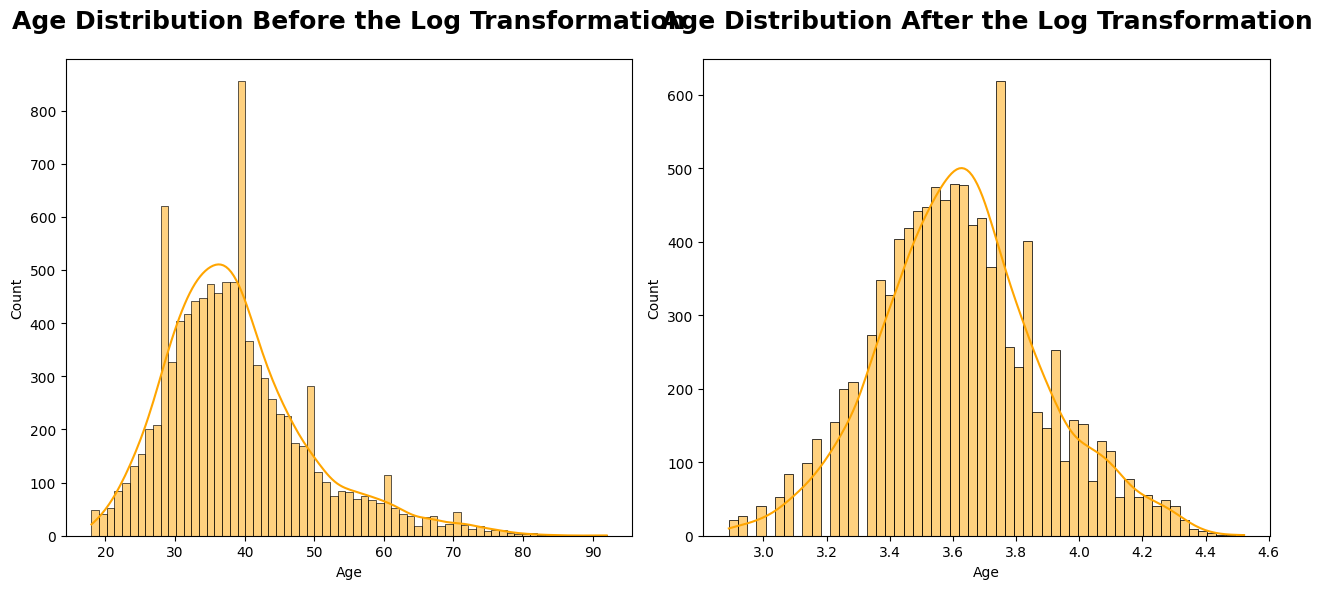

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="orange", kde=True)
plt.title("Age Distribution Before the Log Transformation",fontweight="black",size=18,pad=22)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="orange", kde=True)
plt.title("Age Distribution After the Log Transformation",fontweight="black",size=18,pad=22)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,ChurnedorNot,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tot_Products_More Than 2 Products,Tot_Products_One product,Tot_Products_Two Products,Acc_Balance_More Than Zero Balance,Acc_Balance_Zero Balance
0,619,3.737670,2,Yes,Yes,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,3.713572,1,No,Yes,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,3.737670,8,Yes,No,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,3.663562,1,No,No,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,3.761200,2,Yes,Yes,79084.10,0,0,0,1,1,0,0,1,0,1,0


Finally , mapping the "HasCrCard" and "IsActiveMember" Columns

In [ ]:
df['HasCrCard'] = df['HasCrCard'].map(lambda x: 1 if x == 'Yes' else 0)
df['IsActiveMember'] = df['IsActiveMember'].map(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,ChurnedorNot,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tot_Products_More Than 2 Products,Tot_Products_One product,Tot_Products_Two Products,Acc_Balance_More Than Zero Balance,Acc_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,3.713572,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,3.737670,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,3.663562,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,3.761200,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [ ]:
X = df.drop(columns=["ChurnedorNot"])
y = df["ChurnedorNot"]

**Splitting Data For Model Training & Testing**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("Shape of x_train is: {0}".format(x_train.shape))
print("Shape of x_test is: {0}".format(x_test.shape))
print("Shape of y_train is: {0}".format(y_train.shape))
print("Shape of y_test is:{0}".format(y_test.shape))

Shape of x_train is: (8000, 16)
Shape of x_test is: (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:(2000,)


Now the data is splitted for model training and testing, with this we can start building our predictive models

As a final step as we saw in the EDA section there was a huge class imbalance in our target variable ,so we apply the SMOTE to overcome this imbalance

In [ ]:
smt = SMOTE(random_state=42)

In [ ]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [ ]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 16) (12736,)


In [ ]:
y_train_resampled.value_counts().to_frame()

,count
ChurnedorNot,
0,6368
1,6368


Now that it is done, we will start with our models

# **7. Models**

**1. Logistic Regression**

In [ ]:
logreg = LogisticRegression(random_state=0)

In [ ]:
param_grid_logreg = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [ ]:
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search_logreg.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='accuracy')

In [ ]:
best_params_logreg = grid_search_logreg.best_params_
print(f"Best Parameters for Logistic Regression Model are: {best_params_logreg}")

Best Parameters for Logistic Regression Model are: {'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
best_logreg = LogisticRegression(**best_params_logreg, random_state=0)
best_logreg.fit(x_train_resampled, y_train_resampled)

LogisticRegression(C=0.0018329807108324356, random_state=0)

In [ ]:
y_train_pred = best_logreg.predict(x_train_resampled)
y_test_pred = best_logreg.predict(x_test)

print("Logistic Regression Training Accuracy:",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Logistic Regression Testing Accuracy:",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Logistic Regression Training Accuracy: 82.3 %
Logistic Regression Testing Accuracy: 72.05 %


In [ ]:
print("Logistic Regression Model F1 Score is {0}".format(f1_score(y_test,y_test_pred,average="micro")))
print("Logistic Regression Model Recall is {0}".format(recall_score(y_test,y_test_pred,average="micro")))
print("Logistic Regression Model Precision Score is {0}".format(precision_score(y_test,y_test_pred,average="micro")))

Logistic Regression Model F1 Score is 0.7205
Logistic Regression Model Recall is 0.7205
Logistic Regression Model Precision Score is 0.7205


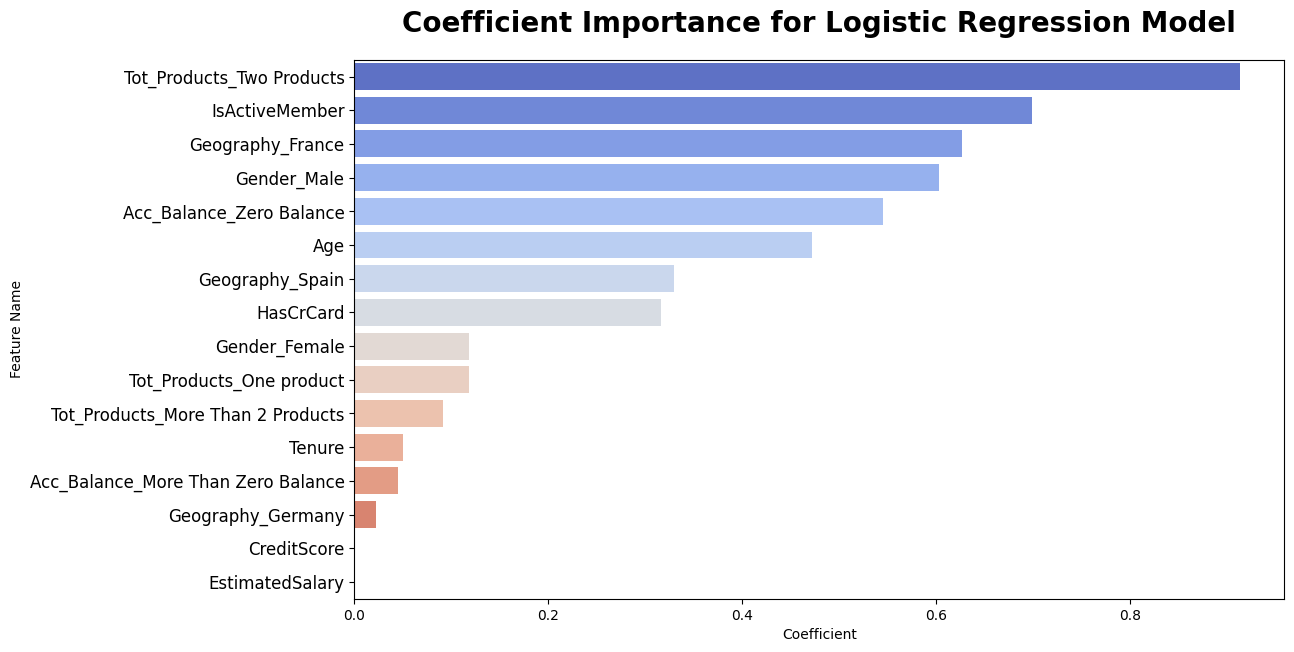

In [ ]:

coefficients = pd.DataFrame({"Feature Name": x_train_resampled.columns, "Coefficient": best_logreg.coef_[0]})
coefficients['Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x="Coefficient", y="Feature Name", data=coefficients, palette="coolwarm")
plt.title("Coefficient Importance for Logistic Regression Model", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

From the evaluation of the Logistic Regression Model, some of the important features influencing customer churn is Total Number of products, how active they are, and their geographical location. And Credit Score and Estimated Salary have minimal influence

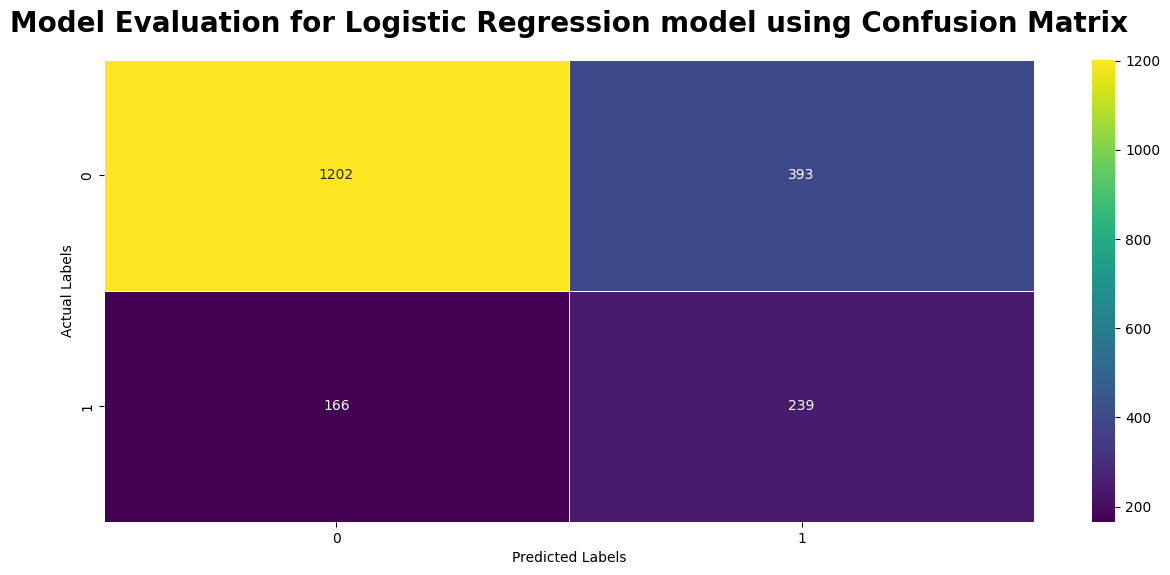

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="viridis")
plt.title("Model Evaluation for Logistic Regression model using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

The confusion matrix for the Logistic Regression model reveals a strong predictive accuracy for non-churning customers, as indicated by 1202 true negatives. It also displays the model's capability to correctly classify 239 customers as churners. This level of performance indicates the model's reliable capacity to identify the majority of loyal customers, as well as a noteworthy proportion of those likely to churn. Such insights can be pivotal for developing strategies focused on customer retention.

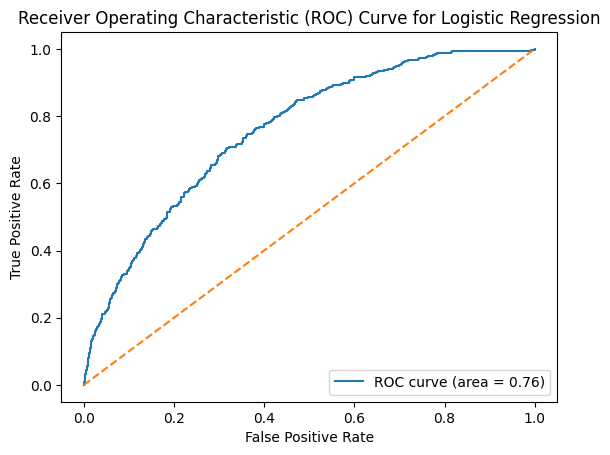

In [ ]:
y_test_proba = best_logreg.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the Logistic Regression model, with an AUC of 0.76, demonstrates a respectable predictive performance. This score indicates that the model has a good ability to distinguish between customers who will churn and those who will not. The curve's shape, rising towards the upper left corner but not hugging the corner closely, suggests that the model correctly identifies a substantial number of true positives while maintaining a moderate rate of false positives. Overall, the model offers a solid but not exceptional capability to classify outcomes correctly in the context of customer churn prediction.

In [ ]:
y_train_pred = best_logreg.predict(x_train_resampled)
y_test_pred = best_logreg.predict(x_test)
logreg_training_accuracy = round(accuracy_score(y_train_resampled, y_train_pred) * 100, 2)
logreg_testing_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)
logreg_f1_score = f1_score(y_test, y_test_pred, average="micro")
logreg_recall = recall_score(y_test, y_test_pred, average="micro")
logreg_precision = precision_score(y_test, y_test_pred, average="micro")
logreg_auc = roc_auc_score(y_test, best_logreg.predict_proba(x_test)[:, 1])



**2.DecisionTree**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [ ]:
grid_search_dt = GridSearchCV(dtree, param_grid, cv=2, n_jobs=1)

grid_search_dt.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search_dt.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=0)

In [ ]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Decision Tree Training Accuracy",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Decision Tree Testing Accuracy",round(accuracy_score(y_test,y_test_pred)*100,2),"%")


Decision Tree Training Accuracy 89.15 %
Decision Tree Testing Accuracy 83.4 %


In [ ]:
print("Decision Tree Model F1 Score is {0}".format(f1_score(y_test,y_test_pred,average="micro")))
print("Decision Tree Model Recall is {0}".format(recall_score(y_test,y_test_pred,average="micro")))
print("Decision Tree Model Precision Score is {0}".format(precision_score(y_test,y_test_pred,average="micro")))

Decision Tree Model F1 Score is 0.834
Decision Tree Model Recall is 0.834
Decision Tree Model Precision Score is 0.834


In [ ]:
dt_imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

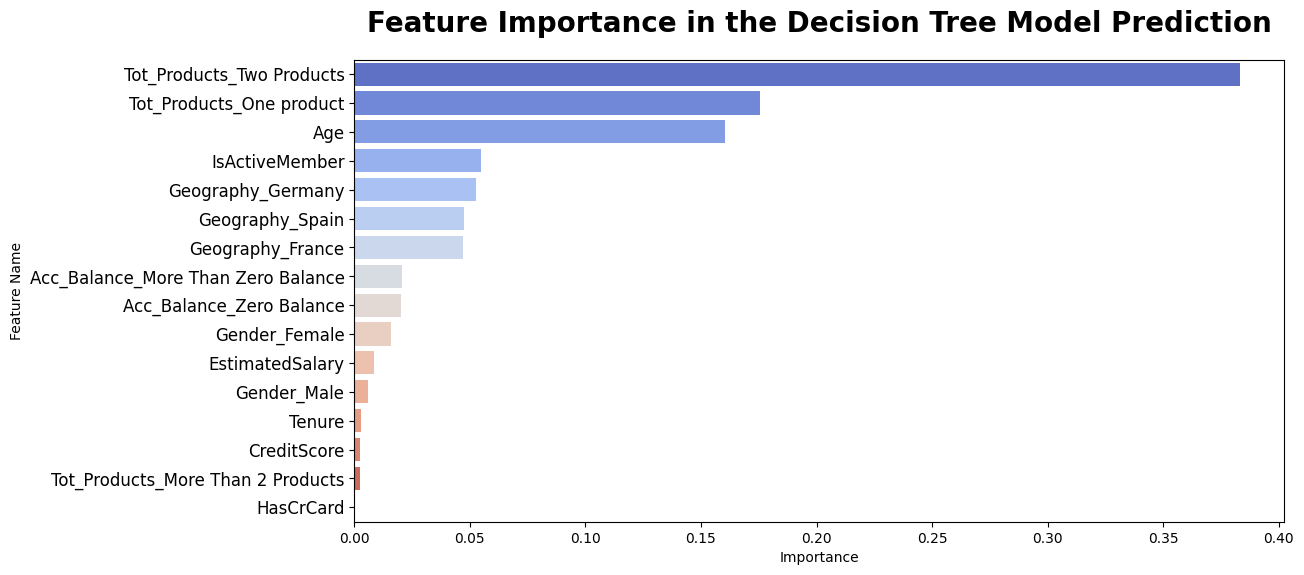

In [ ]:
dt_features = dt_imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature Name", data=dt_features, palette="coolwarm")
plt.title("Feature Importance in the Decision Tree Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

From  the decision tree model evaluation we can see some of the important features influencing the customer churn is Total Products they use, Age and their engagement while Credit Score , Tenure are some of the features which have minimal influence

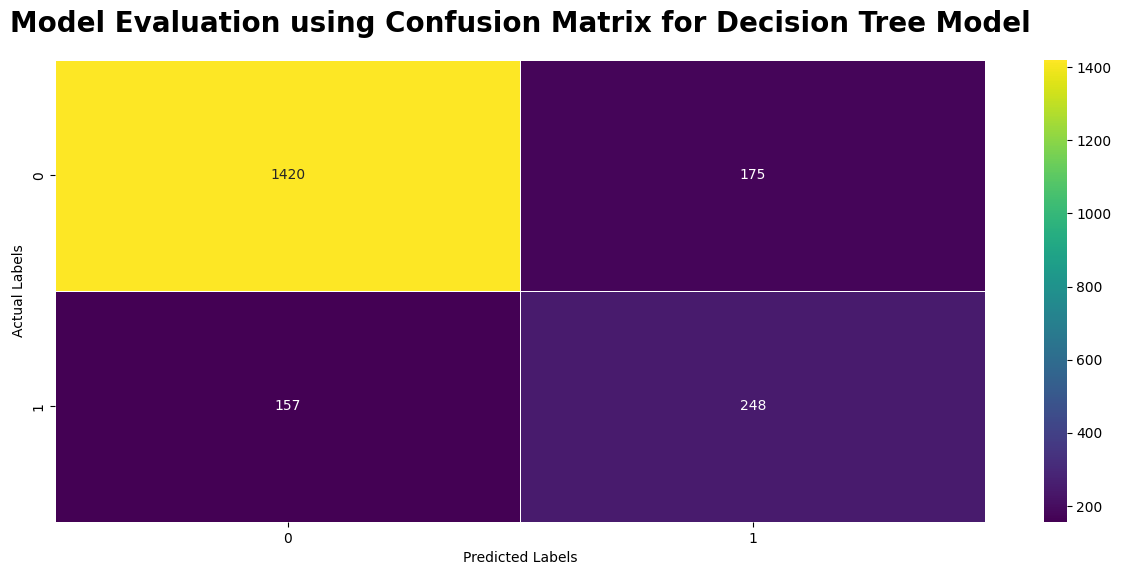

In [ ]:
dt_cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=dt_cm, linewidth=.5, annot=True, fmt="g", cmap="viridis")
plt.title("Model Evaluation using Confusion Matrix for Decision Tree Model",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

The model illustrates a solid performance in distinguishing customers who will not churn, with 1420 true negatives. Furthermore, the model has identified 248 individuals correctly as churners, signifying effective detection in this category as well. This performance underscores the model's capability in correctly classifying a significant number of both churners and non-churners, which is essential for understanding and potentially improving customer retention.

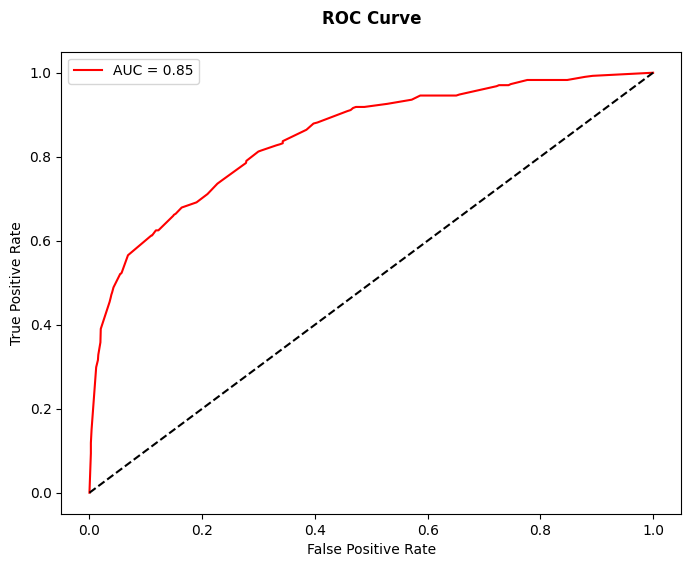

In [ ]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="red")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

The ROC curve for the model in question, which is characterized by a rich red line and an AUC (Area Under the Curve) of 0.85, indicates a very good level of prediction capability. This AUC value suggests that the model has a strong ability to differentiate between the positive and negative classes. The curve is approaching the top left corner of the graph, which is the ideal point, representing a high true positive rate and a low false positive rate. The model, therefore, is likely to correctly identify a high number of actual positives (e.g., customers who will churn) while keeping the number of false alarms (e.g., non-churning customers incorrectly identified as churning) relatively low. With an AUC of 0.85, the model is considered to have very good classification power for the task it's applied to.

In [ ]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)
dt_training_accuracy = round(accuracy_score(y_train_resampled, y_train_pred) * 100, 2)
dt_testing_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)
dt_f1_score = f1_score(y_test, y_test_pred, average="micro")
dt_recall = recall_score(y_test, y_test_pred, average="micro")
dt_precision = precision_score(y_test, y_test_pred, average="micro")
dt_auc = roc_auc_score(y_test, dtree.predict_proba(x_test)[:, 1])

**3.Random Forest Model**

In [ ]:

randomForestModel = RandomForestClassifier()
paramGrid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}
x_sample = x_train_resampled
y_sample = y_train_resampled

random_search_rf = RandomizedSearchCV(
  randomForestModel,
    paramGrid,
    n_iter=50,
    cv=3,
    n_jobs=4,
    random_state=42
)
random_search_rf.fit(x_sample, y_sample)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 70, 90, 100]},
                   random_state=42)

In [ ]:
bestParametersofModel = random_search_rf.best_params_

print("Best Parameters for RandomForest Model is:\n")
bestParametersofModel

Best Parameters for RandomForest Model is:



{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'entropy'}

In [ ]:
rfc = RandomForestClassifier(**bestParametersofModel)

rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=8)

In [ ]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Random Forest Training accuracy:",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Random Forest Testing accuracy:",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Random Forest Training accuracy: 90.61 %
Random Forest Testing accuracy: 84.2 %


In [ ]:
print("F1 Score of Random Forest:",round(f1_score(y_test,y_test_pred,average="micro"),2))
print("Recall Score of Random Forest:",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of Random Forest:",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of Random Forest: 0.84
Recall Score of Random Forest: 0.842
Precision Score of Random Forest: 0.842


In [ ]:
impDf_rf = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

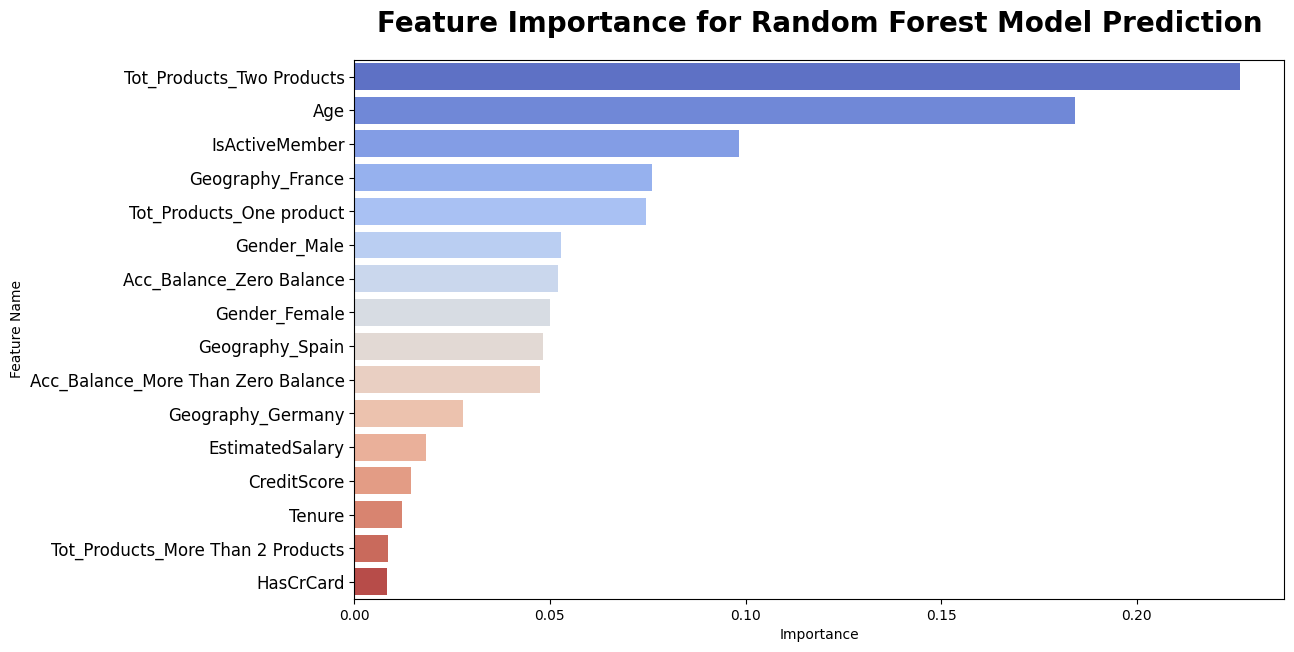

In [ ]:
features = impDf_rf.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="coolwarm")
plt.title("Feature Importance for Random Forest Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

From the evaluation of Random Forest Model, we can see some of the features which has the most influence on churn is Total number of products that they use, age,and their current engagement with the bank, with  tenure , HasCrCard and the rest having the most minimal influence

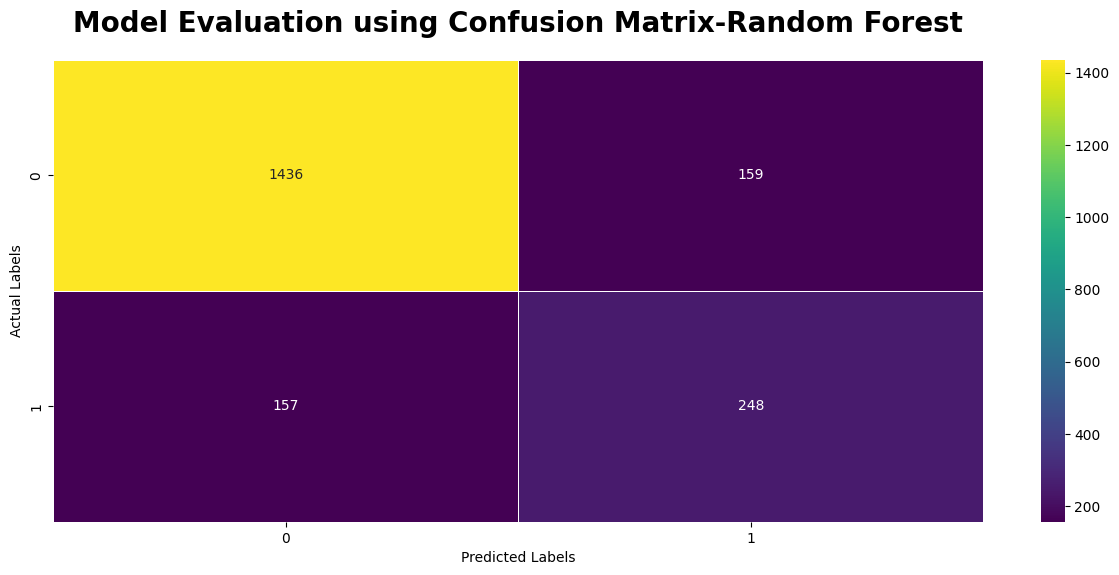

In [ ]:
confMatrix_rf = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=confMatrix_rf, linewidth=.5, annot=True, fmt="g", cmap="viridis")
plt.title("Model Evaluation using Confusion Matrix-Random Forest",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

The confusion matrix for the Random Forest classifier showcases a robust predictive ability, with a substantial number of true negatives (1436) where customers were accurately identified as not churning. Additionally, the model correctly predicted 248 true positives, pinpointing customers who were at risk of churning. This indicates a strong capacity of the model to discern the majority of loyal customers and a significant portion of those who churn, which is crucial for targeted customer retention strategies.

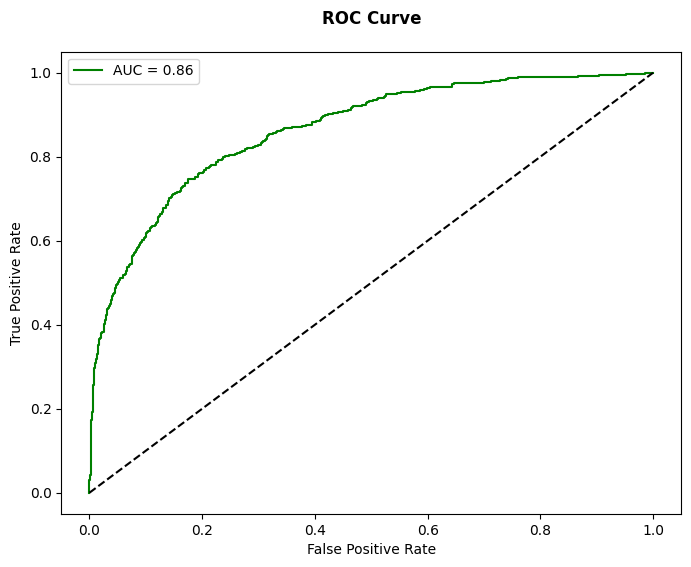

In [ ]:
predicted_probabilities = rfc.predict_proba(x_test)[:, 1]
results_dataframe = pd.concat([pd.DataFrame(np.array(y_test), columns=["actual_labels"])])
results_dataframe.index = y_test.index
false_positive_rate, true_positive_rate, threshold_values = roc_curve(results_dataframe["actual_labels"], predicted_probabilities)
roc_auc = roc_auc_score(results_dataframe["actual_labels"], predicted_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f"AUC = {roc_auc:.2f}", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", pad=20, fontweight="bold")
plt.legend()
plt.show()

With an AUC of 0.86, the Random Forest model shows a high level of discriminative ability. It means that there's a high chance that the model will rank a randomly chosen positive instance (actual churner) higher than a randomly chosen negative instance (actual non-churner) in terms of risk of churning.



In [ ]:
rf_y_train_pred = rfc.predict(x_train_resampled)
rf_y_test_pred = rfc.predict(x_test)
rf_training_accuracy = round(accuracy_score(y_train_resampled, rf_y_train_pred) * 100, 2)
rf_testing_accuracy = round(accuracy_score(y_test, rf_y_test_pred) * 100, 2)
rf_f1_score = f1_score(y_test, rf_y_test_pred, average="micro")
rf_recall = recall_score(y_test, rf_y_test_pred, average="micro")
rf_precision = precision_score(y_test, rf_y_test_pred, average="micro")
rf_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

In [ ]:
comparison_data = {
    "Model": ["Logistic Regression","Decision Tree", "Random Forest"],
    "Training Accuracy (%)": [logreg_training_accuracy,dt_training_accuracy, rf_training_accuracy],
    "Testing Accuracy (%)": [logreg_testing_accuracy,dt_testing_accuracy, rf_testing_accuracy],
    "F1 Score": [logreg_f1_score,dt_f1_score, rf_f1_score],
    "Recall": [logreg_recall,dt_recall, rf_recall],
    "Precision": [logreg_precision,dt_precision, rf_precision],
    "AUC Score": [logreg_auc,dt_auc, rf_auc]
}

comparison_df = pd.DataFrame(comparison_data)

comparison_df


,Model,Training Accuracy (%),Testing Accuracy (%),F1 Score,Recall,Precision,AUC Score
0,Logistic Regression,82.30,72.05,0.7205,0.7205,0.7205,0.758413
1,Decision Tree,89.15,83.40,0.8340,0.8340,0.8340,0.846473
2,Random Forest,90.61,84.20,0.8420,0.8420,0.8420,0.862501


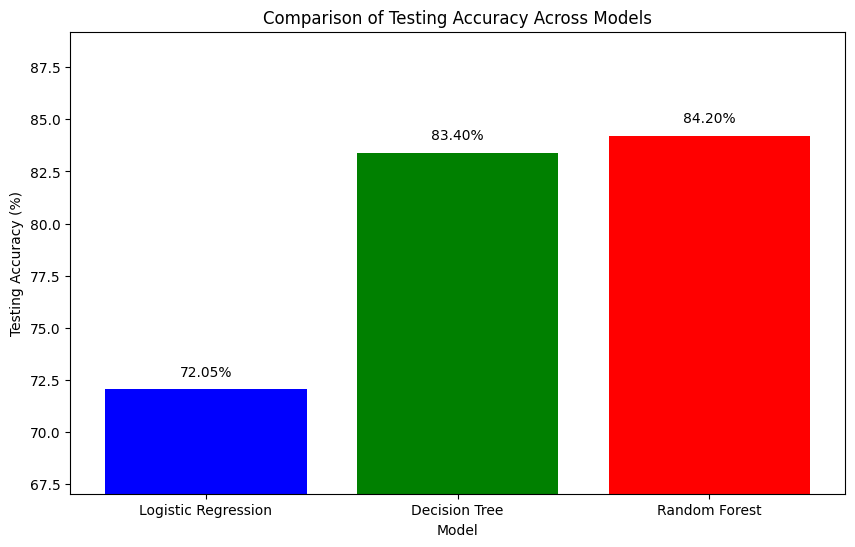

In [ ]:
models = comparison_df['Model']
test_accuracies = comparison_df['Testing Accuracy (%)']
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Testing Accuracy (%)')
plt.title('Comparison of Testing Accuracy Across Models')
plt.ylim([min(test_accuracies) - 5, max(test_accuracies) + 5])
for i in range(len(models)):
    plt.text(i, test_accuracies[i] + 0.5, f'{test_accuracies[i]:.2f}%', ha = 'center', va = 'bottom')
plt.show()


The Random Forest model emerges as the most effective for the customer churn prediction task based on the metrics from the comparison dataframe. It boasts the highest testing accuracy at 84.20%, suggesting superior generalization to new data. Its F1 score, recall, and precision all align at 0.8420, indicating a balanced performance in terms of both identifying true positives and the accuracy of the positive predictions. Furthermore, its AUC score of 0.8625 outperforms the other models, reflecting its stronger ability to discriminate between customers who will churn and those who won't.